# Shapely 사용하기

---

&emsp;Shapely는 도형과 관련해 다양한 작업을 수행할 수 있습니다. 예를 들어 아래와 같은 작업들을 수행할 수 있습니다.

* 점(Point), 선(line), 다각형(polygon) 생성  
* 도형의 면적, 길이, 둘레 등 계산
* 도형 간의 병합(`union`), 빼기(`difference`), 거리 계산
* 두 도형이 교차(intersect), 접촉(touch), 횡단(cross)하는지 등 여부 확인  

## 점(Point)

&emsp;점(Point) 객체를 생성하는 것은 간단합니다. 좌표(x, y 또는 x, y, z)를 생성자(constructor)에 전달하면 됩니다.  

In [1]:
# shapely.geometry.Point 클래스 임포트(import)
from shapely.geometry import Point

# 점(Point) 객체 생성
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point4_3D = Point(9.26, -2.456, 0.57)

&emsp;생성한 점 객체를 확인하려면 아래와 같이 도형을 표시할 수 있습니다. 또는 `print` 문을 사용하여 shapely 도형 객체에 대해 텍스트로 표시할 수도 있습니다.

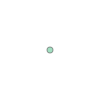

In [2]:
point1

In [3]:
print(point1)
print(point4_3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


&emsp;이 텍스트 표현은 [OGC (Open Geospatial Consortium)](https://www.ogc.org/)의 [Simple Feature Access](https://www.ogc.org/standard/sfa/)에서 제시된 표준인 "WKT (Well-Known Text)" 형식입니다. 위 텍스트 표현 예시에서 `print(point4_3D)`가 "POINT Z ..."로 프린트된 것을 볼 수 있습니다. 여기서 문자 "Z"는 도형의 3차원 버전을 의미합니다.  

&emsp;점 객체의 데이터 유형도 확인해 보겠습니다. 점의 유형이 `shapely.geometry.point.Point` 임을 알 수 있습니다.

In [4]:
type(point1)

shapely.geometry.point.Point

```{note}
&emsp;Shapely는 [GEOS](https://www.osgeo.org/projects/geos/)를 사용하여 도형 객체를 처리합니다. GEOS는 C++ 라이브러리(Python보다 훨씬 빠름)로, GIS의 오픈소스 분야에서 [QGIS](https://qgis.org/en/site/)를 비롯한 지리공간 연산 관련 많은 프로젝트들을 지원합니다.
```

### Point 속성 및 메서드

&emsp;점과 같은 shapely 도형 객체에는 유용한 [속성 및 메서드](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods)들이 기본적으로 내장되어 있습니다. 사용 가능한 속성들을 활용하면, 점의 좌표 값을 추출하거나 점 사이의 유클리드 거리를 계산하는 등 다양한 기하학적 연산을 수행할 수 있습니다.  

&emsp;`geom_type` 속성에는 shapely 도형에 대한 유형 정보가 포함되어 있습니다.  

In [5]:
point1.geom_type

'Point'

&emsp;도형 객체의 좌표값에 접근하기 위한 방법은 여러 가지가 있습니다. 예를 들어, 아래 예시의 속성 `coords`는 `shapely.coords.CoordinateSequence`를 가리키며 좌표 리스트를 `Iterator` 형태로 반환합니다. 여기서 `Iterator`란, 항목들을 리스트 형태로 반환하는 파이썬 데이터 구조 중 한 종류입니다.  

In [6]:
# 좌표값
list(point1.coords)

[(2.2, 4.2)]

&emsp;좌표값에 접근하기 위한 위 방법 외에도 `shapely.geometry.Point` 객체는 좌표값에 *직접* 접근할 수 있는 속성 `x`, `y`, (3차원 도형의 경우만) `z`을 갖습니다.  

In [7]:
# x, y 좌표값 읽기
x = point1.x
y = point1.y

print(x, y)

2.2 4.2


In [8]:
# (3차원) x, y, z 좌표값 읽기
x = point4_3D.x
y = point4_3D.y
z = point4_3D.z

print(x, y, z)

9.26 -2.456 0.57


&emsp;[`distance`](https://shapely.readthedocs.io/en/stable/manual.html#object.distance) 메서드를 사용하여 두 객체 사이의 거리를 계산하는 것도 가능합니다.  

&emsp;아래 예제에서 두 점 간의 거리는 데카르트(cartesian) 좌표계에서 계산됩니다. 하지만, 실제 GIS 데이터로 작업할 때에는 사용된 좌표 참조 시스템(CRS)을 기반으로 거리 계산을 수행합니다. 따라서 거리 계산시 사용된 좌표 참조 시스템(CRS)의 측정 단위(예. m)가 무엇인지 확인해야 합니다. `point1`과 `point2` 사이의 거리를 계산해 보겠습니다.

In [9]:
# point1과 point2 간 거리 계산
dist = point1.distance(point2)

print(f"점 사이의 거리는 {dist:.2f} unit 입니다.")

점 사이의 거리는 29.72 unit 입니다.


```{caution}
&emsp;Shapely를 사용하여 거리 및 면적을 계산할 때 기본적으로 내장된 메서드는,<br/>
&emsp;&emsp;a) 평면, 데카르트(Cartesian), 유클리드 공간을 가정하고<br/>
&emsp;&emsp;b) 계산된 값을 좌표계의 단위(예: m, 도; degree)에 따라 반환합니다.  
```

## 선 (Lines)

&emsp;선(`LineString`) 객체 생성 방법은 점(`Point`) 생성과 유사합니다. 단일 좌표값을 갖는 튜플(`(2.2, 4.2)`) 대신에, 좌표 튜플 리스트(`[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]`) 또는 선을 구성하는 점들의 리스트를 사용합니다.  

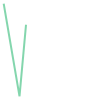

In [10]:
# LineString 클래스 임포트
from shapely.geometry import LineString

# 점(Point) 객체로부터 선(LineString) 생성
line = LineString([point1, point2, point3])
line

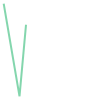

In [11]:
# 좌표 튜플 리스트로부터 선 생성
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line2

&emsp;아래의 텍스트 표현은 WKT 포맷입니다. WKT는 사람이 읽을 수 있는 텍스트 형식이므로 편리하며, 대부분의 GIS 도구에서도 사용됩니다. 또한 `LineString`이 여러 개의 좌표로 구성된 튜플로 되어 있음을 알 수 있습니다. WKT `LINESTRING`의 값은 쉼표`,`로 결합된 여러 개의 WKT `POINTS`의 값으로 구성됩니다.  

In [12]:
print(line)
print(line2)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


&emsp;데이터 유형도 확인해 보겠습니다.  

In [13]:
# line 객체의 데이터 타입 확인
type(line)

shapely.geometry.linestring.LineString

In [14]:
# line 객체의 도형 타입(geometry type) 확인
line.geom_type

'LineString'

### LineString 속성 및 메서드

&emsp;Shapely의 선 관련 도형(`LineString`, `LinearRing`, `MultiLineString`)에는 유용한 기능을 제공하는 다양한 속성과 메서드가 있습니다. 예를 들어 도형의 좌표에 접근하고, 길이를 계산하고, 중심점을 찾고, 선을 따라서 지정된 간격으로 점을 찍거나, 선과 다른 도형 사이의 최근접 거리를 계산할 수 있습니다.  

&emsp;선의 좌표에 접근하는 것은 점의 좌표에 접근하는 것과 매우 유사합니다. 선을 구성하기 위해서는 적어도 두 개 이상의 좌표 튜플이 있어야 하므로, 리스트에는 여러 개의 값이 포함됩니다.

In [15]:
# line 객체의 좌표 튜플
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

&emsp;선의 모든 x 좌표 또는 모든 y 좌표에 접근해야 하는 경우 `xy` 속성을 사용할 수 있습니다.  

In [16]:
# line 객체의 x, y 좌표
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


```{admonition} 3D-LineStrings
:class: danger
&emsp;Shapely 도형의 `xy` 속성은 3차원 도형에서 `z` 값을 반환하지는 않습니다.  
```

&emsp;GIS 분석에 유용한 또다른 속성으로, 선의 길이와 중심점(centroid)을 구할 수 있습니다. 선(또는 다른 타입의 도형)의 중심점은 `shapely.geometry.Point` 객체입니다.

In [17]:
# line 객체의 길이
line_length = line.length
print(f"선의 길이: {line_length:.1f} unit")

선의 길이: 52.5 unit


In [18]:
# line 객체의 중심점
print(line.centroid)

POINT (6.229961354035622 -11.892411157572392)


## 다각형 (Polygon)

```{figure} ./img/polygon.png
---
height: 300px
---
다각형(Polygon) 예시
```

&emsp;다각형(Polygon)을 생성하는 것은 점 또는 선을 생성하는 것과 동일한 논리를 따릅니다. 그러나 다각형을 생성하기 위해 성립해야 하는 규칙은 보다 더 복잡합니다. 다각형의 외부(shell)를 형성하는 하나의 선형 링이 존재해야 하며, 앞에서 생성된 다각형 쉘(shell)에서 잘라낼 부분을 가리키는 여러 개의 선형 링들로 구성됩니다.  

&emsp;따라서, `shapely.geometry.Polygon` *생성자* 함수는 두 개의 파라미터를 필요로 합니다. 첫 번째 파라미터인 쉘(`shell`)은 좌표 튜플 리스트 또는 점 리스트 또는 `LinearRing`이며, 다각형의 외부를 형성합니다. 두 번째 파라미터인 구멍(`holes`)은 선택적(사용해도 되고, 사용하지 않아도 됨)으로 사용되며, 쉘에서 잘라낼 구멍의 리스트 입니다. 이 리스트에 들어갈 항목들은 쉘과 동일한 데이터 타입 입니다.  

&emsp;먼저, 구멍이 없는 간단한 다각형을 만들어 보겠습니다. 첫 번째 예제는 **3개의 좌표로 구성된 튜플**을 사용합니다.  

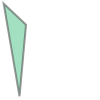

In [19]:
from shapely.geometry import Polygon

# 좌표로부터 다각형 생성
polygon1 = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
polygon1

&emsp;점 리스트에서 직접 다각형을 생성할 수도 있습니다.

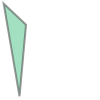

In [20]:
polygon2 = Polygon([point1, point2, point3])
polygon2

&emsp;또는 [`LinearRing`](https://shapely.readthedocs.io/en/stable/manual.html#linearrings)으로 다각형을 생성할 수도 있습니다. `shapely.geometry.LinearRing`을 구성할 때, 마지막에 첫 번째 점을 다시 나열하는 것을 생략할 수 있습니다. 이런 경우, Shapely는 점 리스트의 끝에 첫 번째 포인트를 자동으로 다시 추가합니다.  

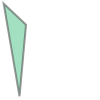

In [21]:
from shapely.geometry import LinearRing

shell = LinearRing([point1, point2, point3, point1])
polygon3 = Polygon(shell)
polygon3

&emsp;세 개의 다각형 `polygon1`, `polygon2`, `polygon3`를 생성하기 위해 동일한 값과 서로 다른 방법들을 사용했습니다. 이 다각형들이 동일한 도형을 표현하는지 확인해 보겠습니다.  

In [22]:
polygon1 == polygon2 == polygon3

True

&emsp;점, 선과 마찬가지로 `shapely.geometry.Polygon`의 텍스트 표현은 WKT (Well-Known Text) 포맷입니다. WKT `POLYGON`은 하나 이상의 WKT `LINEARRING`으로 구성됩니다. 첫 번째 선형 링은 외부(`shell`)를 나타내며, 그 이후에 등장하는 선형 링들은 쉘에서 잘라낼 구멍들(`holes`)을 나타냅니다. 아래 코드에서는 구멍이 없는 다각형이므로, 하나의 선형 링으로만 구성되어 있습니다.  

In [23]:
print(polygon1)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


&emsp;데이터 타입을 확인해 보겠습니다.  

In [24]:
# 데이터 타입
type(polygon1)

shapely.geometry.polygon.Polygon

In [25]:
# 도형 타입
polygon1.geom_type

'Polygon'

```{tip}
&emsp;내장 `help()` 함수를 사용하여 함수 또는 클래스가 작동하는 방식, 필요한 파라미터, 사용할 수 있는 속성 및 메소드를 확인할 수 있습니다.  
```

In [32]:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A geometry type representing an area that is enclosed by a linear ring.
 |  
 |  A polygon is a two-dimensional feature and has a non-zero area. It may
 |  have one or more negative-space "holes" which are also bounded by linear
 |  rings. If any rings cross each other, the feature is invalid and
 |  operations on it may fail.
 |  
 |  Parameters
 |  ----------
 |  shell : sequence
 |      A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
 |      an array-like with shape (N, 2) or (N, 3).
 |      Also can be a sequence of Point objects.
 |  holes : sequence
 |      A sequence of objects which satisfy the same requirements as the
 |      shell parameters above
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A s

&emsp;이번에는 구멍이 있는 다각형을 만들어 보겠습니다. 외부 쉘과 구멍이 각각 어떻게 생겼는지 살펴보겠습니다.  

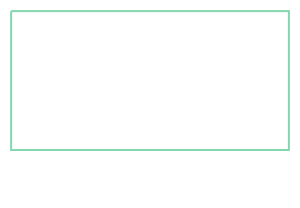

In [27]:
# 외부(Shell) 정의
outer = LinearRing([(-180, 90), (-180, -90), (180, -90), (180, 90)])
outer

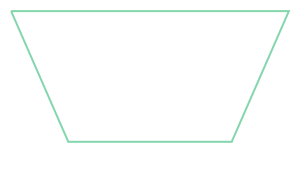

In [28]:
# 구멍(Holes) 정의
hole = LinearRing([(-170, 80), (-100, -80), (100, -80), (170, 80)])
hole

&emsp;외부 쉘과 하나의 구멍(`holes`는 리스트로 정의)으로 구성된 다각형을 생성합니다.  

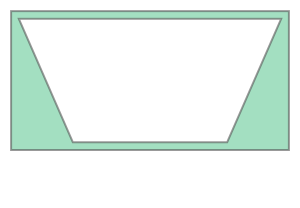

In [29]:
polygon_with_hole = Polygon(outer, [hole])
polygon_with_hole

In [30]:
print(polygon_with_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -100 -80, 100 -80, 170 80, -170 80))


### Polygon 속성 및 메서드

&emsp;`shapely.geometry.Polygon`은 앞에서 다룬 점, 선처럼 공간분석 작업에 유용한 여러 속성 및 메서드를 갖고 있습니다. 속성 및 메서드에 대한 전체 목록은 [Shapely 공식 문서](https://shapely.readthedocs.io/en/stable/manual.html)를 확인 바라며, 여기에서는 몇 가지 예를 사용해보도록 하겠습니다.  

In [31]:
print(f"다각형 중심점(centroid): {polygon_with_hole.centroid}")
print(f"다각형 면적(area): {polygon_with_hole.area}")
print(f"다각형 경계 상자(bounding box): {polygon_with_hole.bounds}")
print(f"다각형 외부 링(exterior ring): {polygon_with_hole.exterior}")
print(f"다각형 둘레(circumference): {polygon_with_hole.exterior.length}")

다각형 중심점(centroid): POINT (0 -13.827160493827162)
다각형 면적(area): 21600.0
다각형 경계 상자(bounding box): (-180.0, -90.0, 180.0, 90.0)
다각형 외부 링(exterior ring): LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
다각형 둘레(circumference): 1080.0


---

```{raw} html
<script src="https://utteranc.es/client.js"
        repo="Kwan-Gu/geospatial_analysis"
        issue-term="pathname"
        theme="preferred-color-scheme"
        crossorigin="anonymous"
        async>
</script>
```